Import Libraies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


Load Dataset

In [3]:
df = pd.read_csv("insurance_claim.csv")
df.head()

,claim_id,customer_age,policy_tenure_years,claim_amount,claim_duration_days,claim_type,hospital_stay_days,previous_claims,region,income_bracket,anomaly
0,1,56,7.71,33860.63,11,Life,8,3,West,High,0
1,2,69,8.14,72605.53,5,Health,1,5,West,Low,0
2,3,46,10.59,113399.27,54,Life,2,2,West,High,0
3,4,32,7.88,144556.01,81,Health,8,0,North,High,0
4,5,60,6.55,180755.15,24,Life,10,5,West,Low,0


Basic Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             50000 non-null  int64  
 1   customer_age         50000 non-null  int64  
 2   policy_tenure_years  50000 non-null  float64
 3   claim_amount         50000 non-null  float64
 4   claim_duration_days  50000 non-null  int64  
 5   claim_type           50000 non-null  object 
 6   hospital_stay_days   50000 non-null  int64  
 7   previous_claims      50000 non-null  int64  
 8   region               50000 non-null  object 
 9   income_bracket       50000 non-null  object 
 10  anomaly              50000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.2+ MB


In [5]:
df.describe()

,claim_id,customer_age,policy_tenure_years,claim_amount,claim_duration_days,hospital_stay_days,previous_claims,anomaly
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,48.538820,7.738102,100728.752744,44.767620,6.966740,2.493020,0.038820
std,14433.901067,17.879704,4.176155,57207.925464,25.631523,4.330553,1.709155,0.193168
min,1.000000,18.000000,0.500000,2005.450000,1.000000,0.000000,0.000000,0.000000
25%,12500.750000,33.000000,4.130000,50699.580000,22.000000,3.000000,1.000000,0.000000
50%,25000.500000,48.000000,7.740000,101168.810000,45.000000,7.000000,2.000000,0.000000
75%,37500.250000,64.000000,11.360000,150220.407500,67.000000,11.000000,4.000000,0.000000
max,50000.000000,79.000000,15.000000,199998.420000,89.000000,14.000000,5.000000,1.000000


In [6]:
df.shape

(50000, 11)

In [7]:
df.isnull().sum()

claim_id               0
customer_age           0
policy_tenure_years    0
claim_amount           0
claim_duration_days    0
claim_type             0
hospital_stay_days     0
previous_claims        0
region                 0
income_bracket         0
anomaly                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['claim_id', 'customer_age', 'policy_tenure_years', 'claim_amount',
       'claim_duration_days', 'claim_type', 'hospital_stay_days',
       'previous_claims', 'region', 'income_bracket', 'anomaly'],
      dtype='object')

EDA (Visualizations)

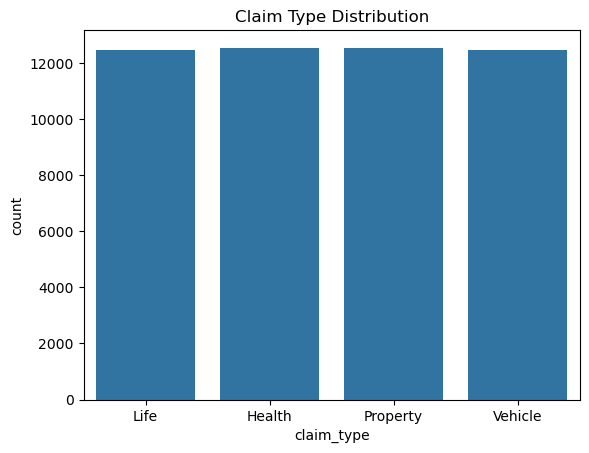

In [10]:
# Claim Type Distribution
sns.countplot(x=df["claim_type"])
plt.title("Claim Type Distribution")
plt.show()


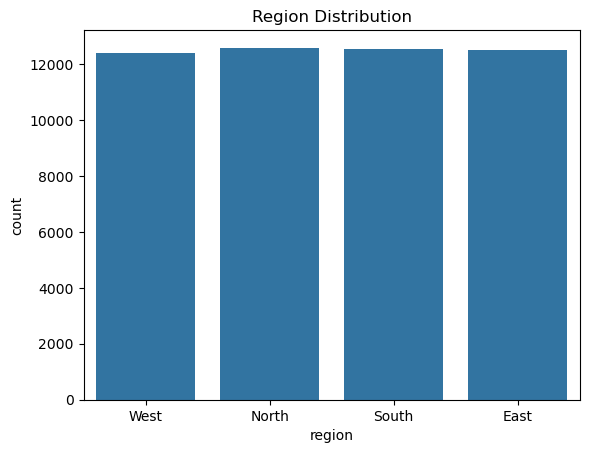

In [11]:
# Region Distribution
sns.countplot(x=df["region"])
plt.title("Region Distribution")
plt.show()

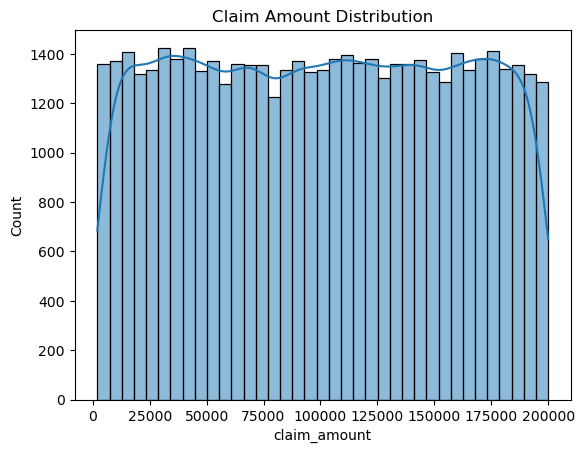

In [12]:
# Claim Amount Distribution
sns.histplot(df["claim_amount"], kde=True)
plt.title("Claim Amount Distribution")
plt.show()


Encoding Categorical Columns

In [13]:
df_enc = pd.get_dummies(df, columns=["claim_type","region","income_bracket"], drop_first=False)

In [14]:
X = df_enc.drop("anomaly", axis=1)
y = df["anomaly"]

Scaling

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Isolation Forest Model

In [17]:
model = IsolationForest(contamination='auto', random_state=42)
model.fit(X_scaled)


IsolationForest(random_state=42)

Predictions

In [18]:
df["predicted"] = model.predict(X_scaled)
df["predicted"] = df["predicted"].apply(lambda x: 1 if x == -1 else 0)


Evaluation

              precision    recall  f1-score   support

           0       0.94      0.00      0.01     48059
           1       0.04      1.00      0.07      1941

    accuracy                           0.04     50000
   macro avg       0.49      0.50      0.04     50000
weighted avg       0.90      0.04      0.01     50000



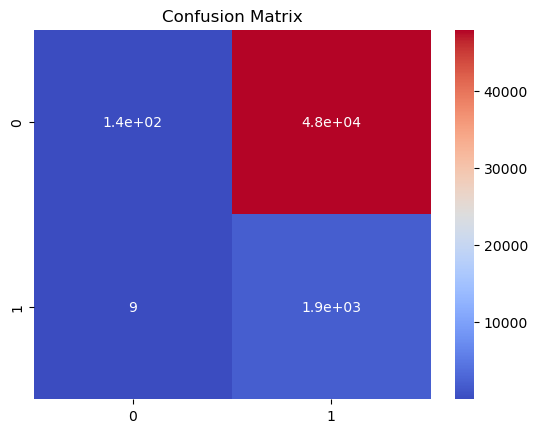

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, df["predicted"]))

sns.heatmap(confusion_matrix(y, df["predicted"]), annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.show()
